# Customer Churn Analysis for telecom company

## Libraries used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

## Data preprocessing
* sample dataset of telecom company user data, showing users left last month

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv", header=0)

In [17]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [18]:
df.shape

(7043, 21)

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [20]:
# df.dtypes

In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


average monthy charge is 64.76 USD , but 25% customers pay more than 89.85 USD per month

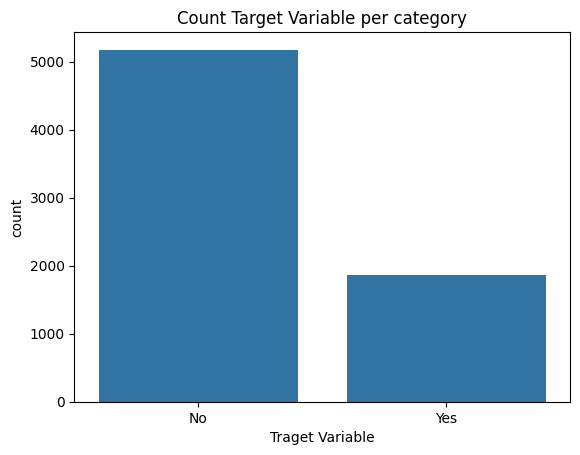

In [22]:
sns.countplot(x = "Churn", data=df)
plt.title("Count Target Variable per category")
plt.xlabel("Traget Variable")
plt.ylabel("count")
plt.show()

In [23]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [24]:
df['Churn'].value_counts()/len(df['Churn'])*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

* the ratio of output variables is 73:26 ie. there is more data for "Yes" than "No".
* Hence the data is imbalanced. for efficient trainning of classification model the ratio of output variable should be nearly 50:50
* Hence we need to increase the data for "Yes", we will do upsampling

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* No missing values in any of the columns
* The TotalCharges column is object here, it is expected to be float, it means it has some anonymous entries like NAN which may lead to null values

### Missing Values

In [26]:
df_copy = df.copy()

In [27]:
df_copy.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* TotalCharges has 11 null entries

In [28]:
df_copy.loc[df_copy.TotalCharges.isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* since the percentage of this null records is very less we can ignore all those rows, so we drop all those rows which has null value

In [29]:
df_copy.dropna(inplace = True)

### Tenure

* As we may tenure from 0 to 72, its very wide data range
* We will devide the customers into bins based on tenure, ex. 1-12 months, 13-24 months, and so on 

In [30]:
labels = ["{0}-{1}".format(i, i+11) for i in range(1,72, 12)]

In [31]:
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [32]:
df_copy['TenureGroup']=pd.cut(df_copy['tenure'],range(1,80,12), right=False, labels=labels)

In [33]:
df_copy['TenureGroup'].value_counts()

TenureGroup
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

### drop columns that are not requires
ie. customerId, tenure

In [34]:
df_copy.drop(columns =[ 'customerID', 'tenure'], axis=1, inplace=True)

In [35]:
data = df_copy
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## EDA (Exploratory Data Analysis)

This code snippet iterates over all predictors (columns) in the data DataFrame, excluding the columns "Churn", "TotalCharges", and "MonthlyCharges", and plots a count plot for each predictor, with the Churn variable used as a hue (to differentiate between churned and non-churned customers).

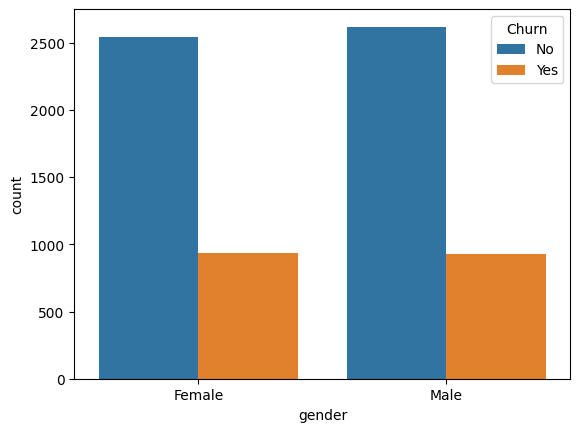

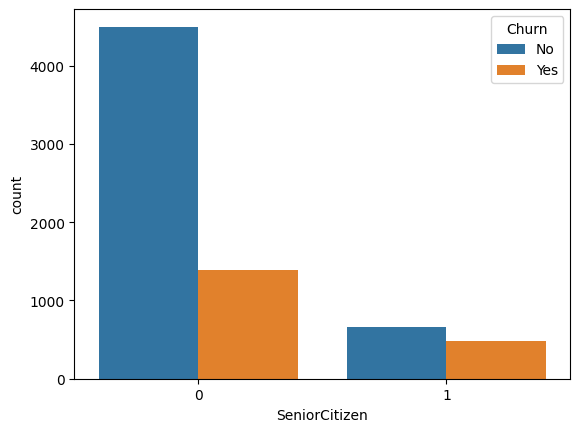

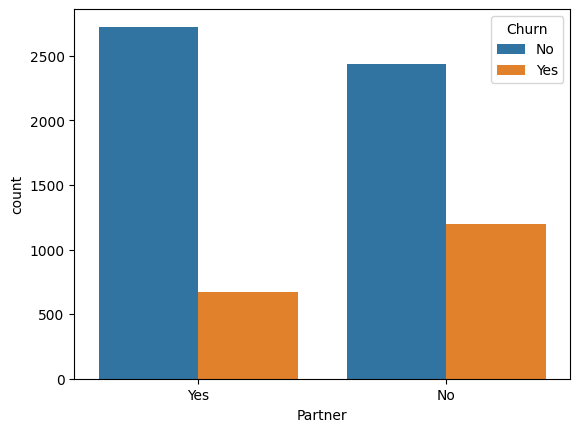

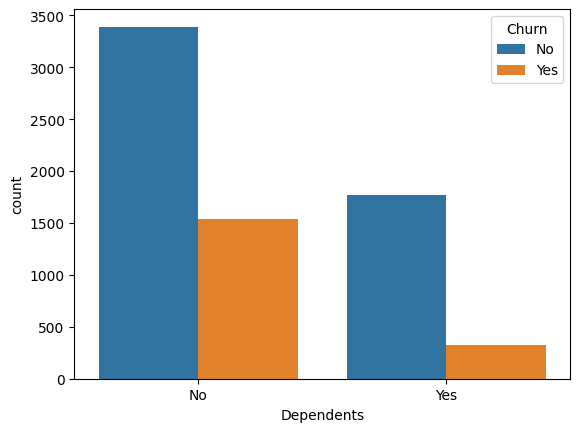

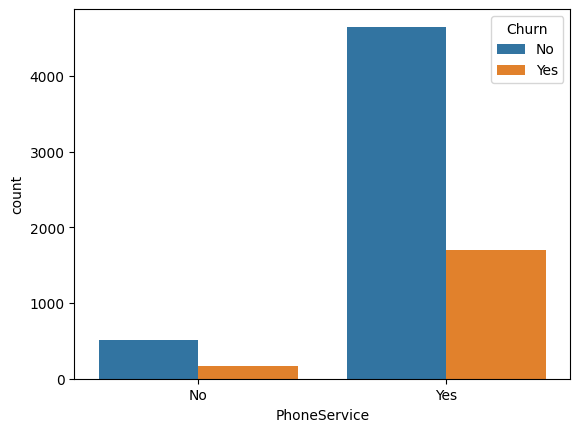

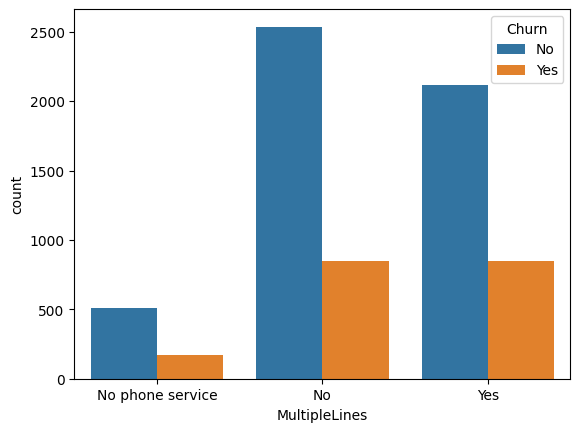

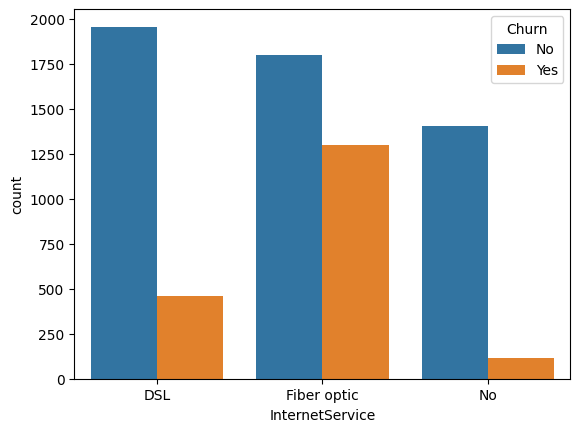

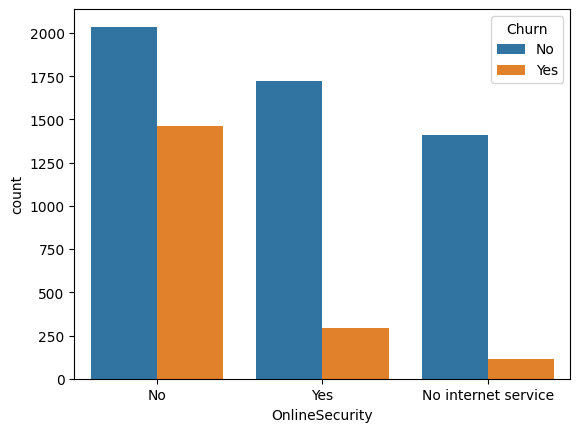

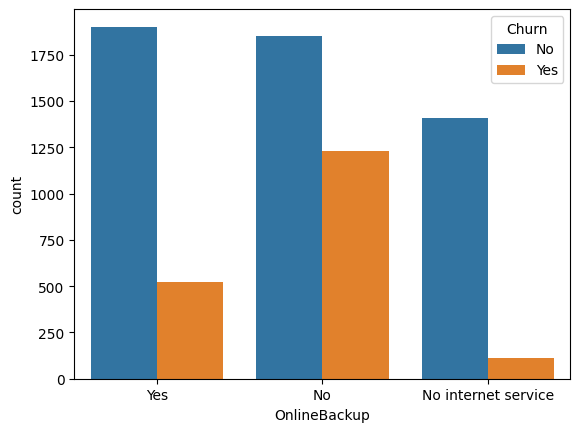

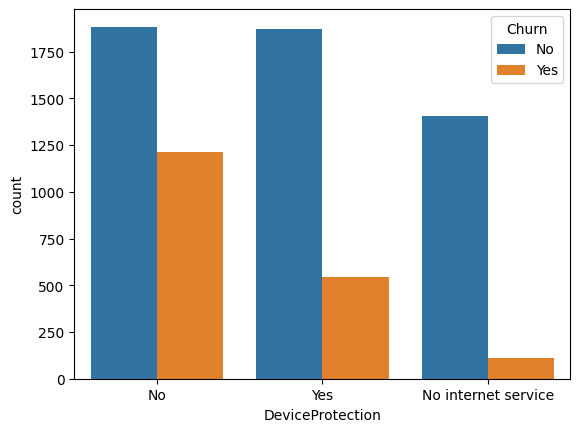

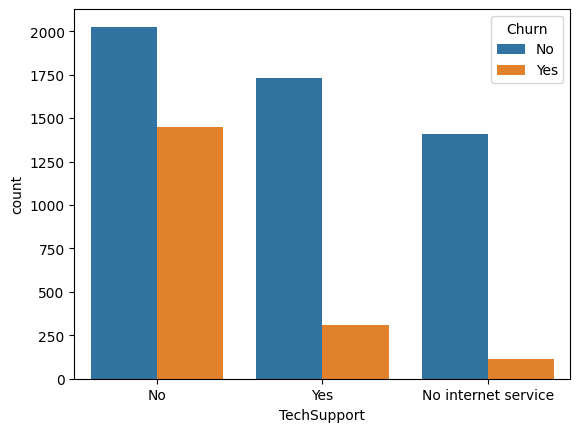

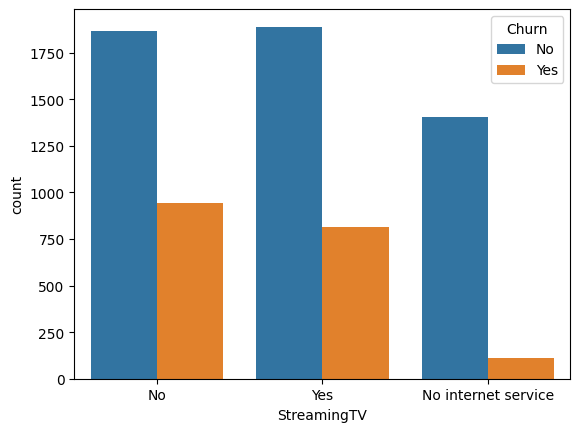

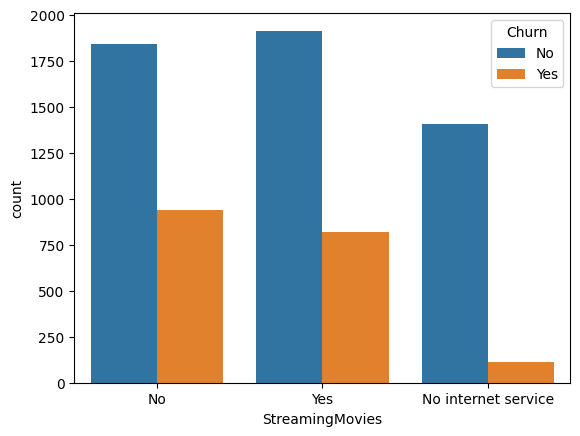

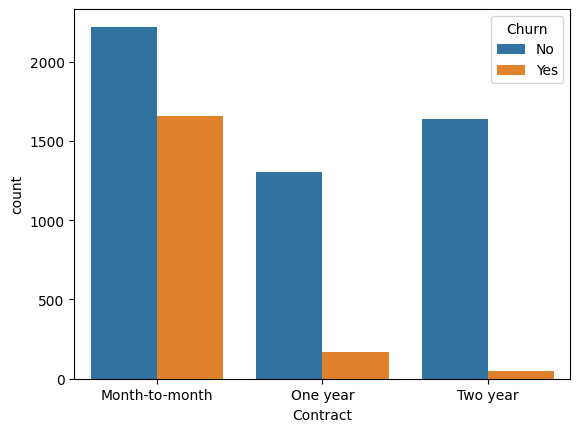

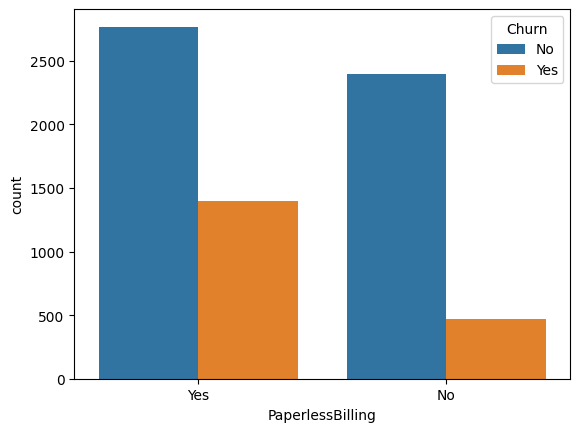

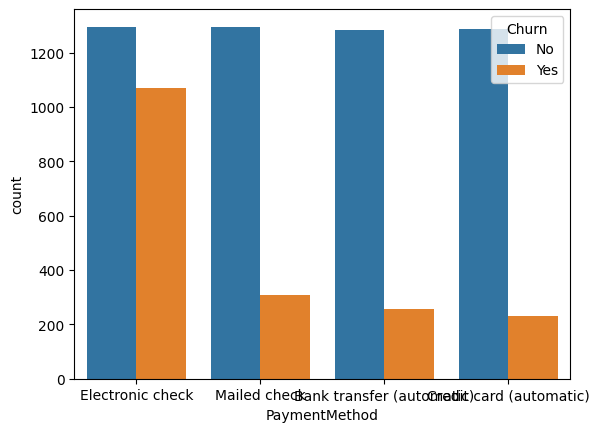

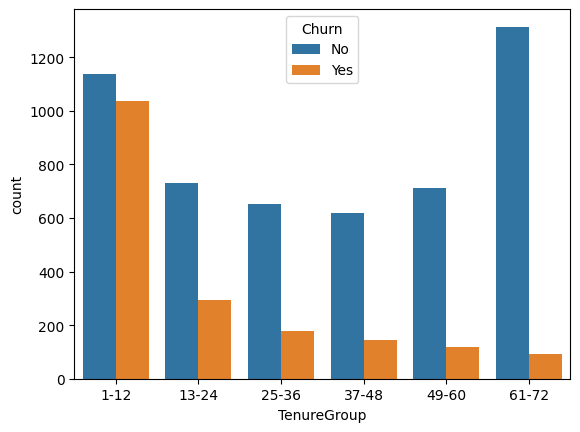

In [36]:
for i, predictor in enumerate(data.drop(columns=["Churn", 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data= data, x= predictor, hue='Churn')

## Variable Transformations

* convert target variable 'Churn' into binary numeric variable (1,0)

In [37]:
data.Churn = np.where(data.Churn == 'Yes', 1,0)

In [38]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


* convert all categorical variaables into dummy variables

In [39]:
data_dummy = pd.get_dummies(data).astype(int)
data_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


### Relation between "MonthlyCharges" and "TotalCharges"

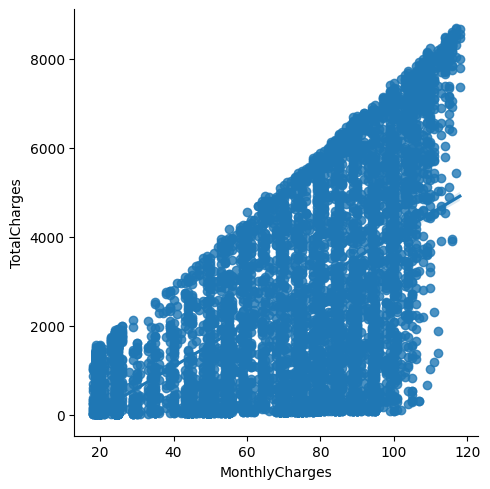

In [40]:
sns.lmplot(data=data_dummy, x= "MonthlyCharges", y="TotalCharges")

Total Charges increase with Monthly Charges, they have high correlation

### churn by monthly charges and total charges

Text(0.5, 1.0, 'Churn by Monthly charges')

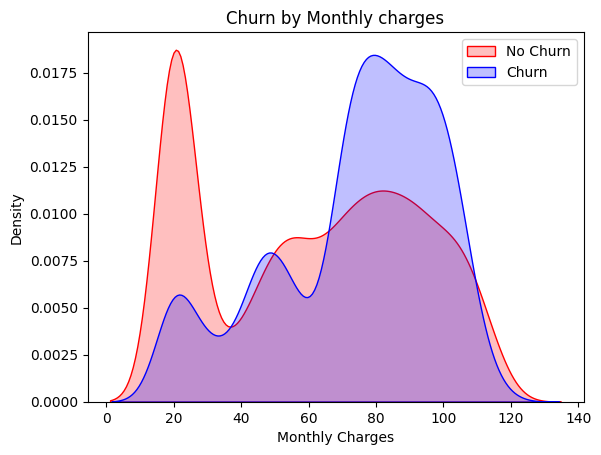

In [41]:
Mth = sns.kdeplot(data_dummy.MonthlyCharges[(data_dummy["Churn"]==0)], color= "Red", fill=True)
Mth = sns.kdeplot(data_dummy.MonthlyCharges[(data_dummy["Churn"]==1)], color= "Blue", fill=True)

Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Monthly Charges")
Mth.set_title("Churn by Monthly charges")

Churn is high when monthly charges are high

Text(0.5, 1.0, 'Churn by Total charges')

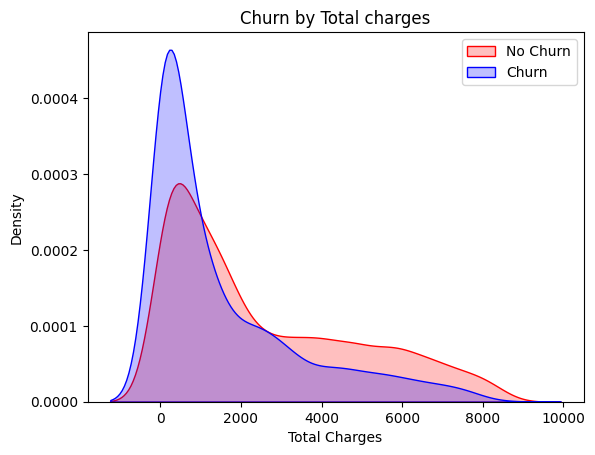

In [42]:
Mth = sns.kdeplot(data_dummy.TotalCharges[(data_dummy["Churn"]==0)], color= "Red", fill=True)
Mth = sns.kdeplot(data_dummy.TotalCharges[(data_dummy["Churn"]==1)], color= "Blue", fill=True)

Mth.legend(["No Churn", "Churn"], loc="upper right")
Mth.set_ylabel("Density")
Mth.set_xlabel("Total Charges")
Mth.set_title("Churn by Total charges")

* Higher churn at lower total charges

* if we combine Tenure, MonthlCharges, TotalCharges then the picture is clear
* Higher Monthly Charges at lower tenure results into lower total charges, Hence higher monthly charges, lower tenure and lower total charge are linked to high churn 

## Corelation of all predictors with 'Churn'

In [54]:
cm = data_dummy.corr()
cm

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
SeniorCitizen,1.000000,0.219829,0.102412,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,...,-0.016235,-0.024359,0.171322,-0.152987,-0.027713,0.001860,0.027317,-0.000929,0.014186,-0.002407
MonthlyCharges,0.219829,1.000000,0.651125,0.192922,0.014095,-0.014095,-0.097890,0.097890,0.112360,-0.112360,...,0.042099,0.030277,0.271238,-0.376615,-0.191927,-0.047242,0.009459,0.017877,0.069855,0.185468
TotalCharges,0.102412,0.651125,1.000000,-0.199485,-0.000049,0.000049,-0.319071,0.319071,-0.064653,0.064653,...,0.186118,0.182664,-0.060436,-0.294708,-0.592444,-0.210747,-0.047367,0.083699,0.252902,0.639312
Churn,0.150541,0.192922,-0.199485,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,-0.163128,...,-0.118136,-0.134687,0.301455,-0.090773,0.319628,0.019929,-0.040997,-0.059579,-0.100800,-0.226078
gender_Female,0.001819,0.014095,-0.000049,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,...,0.015973,-0.001632,-0.000844,-0.013199,0.001050,0.000649,-0.006249,0.020658,0.004319,-0.016279
gender_Male,-0.001819,-0.014095,0.000049,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,...,-0.015973,0.001632,0.000844,0.013199,-0.001050,-0.000649,0.006249,-0.020658,-0.004319,0.016279
Partner_No,-0.016957,-0.097890,-0.319071,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,...,-0.111406,-0.082327,0.083207,0.096948,0.305061,0.048481,-0.003131,-0.035092,-0.105341,-0.280353
Partner_Yes,0.016957,0.097890,0.319071,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,...,0.111406,0.082327,-0.083207,-0.096948,-0.305061,-0.048481,0.003131,0.035092,0.105341,0.280353
Dependents_No,0.210550,0.112360,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,...,-0.052369,-0.061134,0.149274,-0.056448,0.145379,0.001459,-0.009289,-0.023544,-0.031419,-0.118090
Dependents_Yes,-0.210550,-0.112360,0.064653,-0.163128,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,...,0.052369,0.061134,-0.149274,0.056448,-0.145379,-0.001459,0.009289,0.023544,0.031419,0.118090


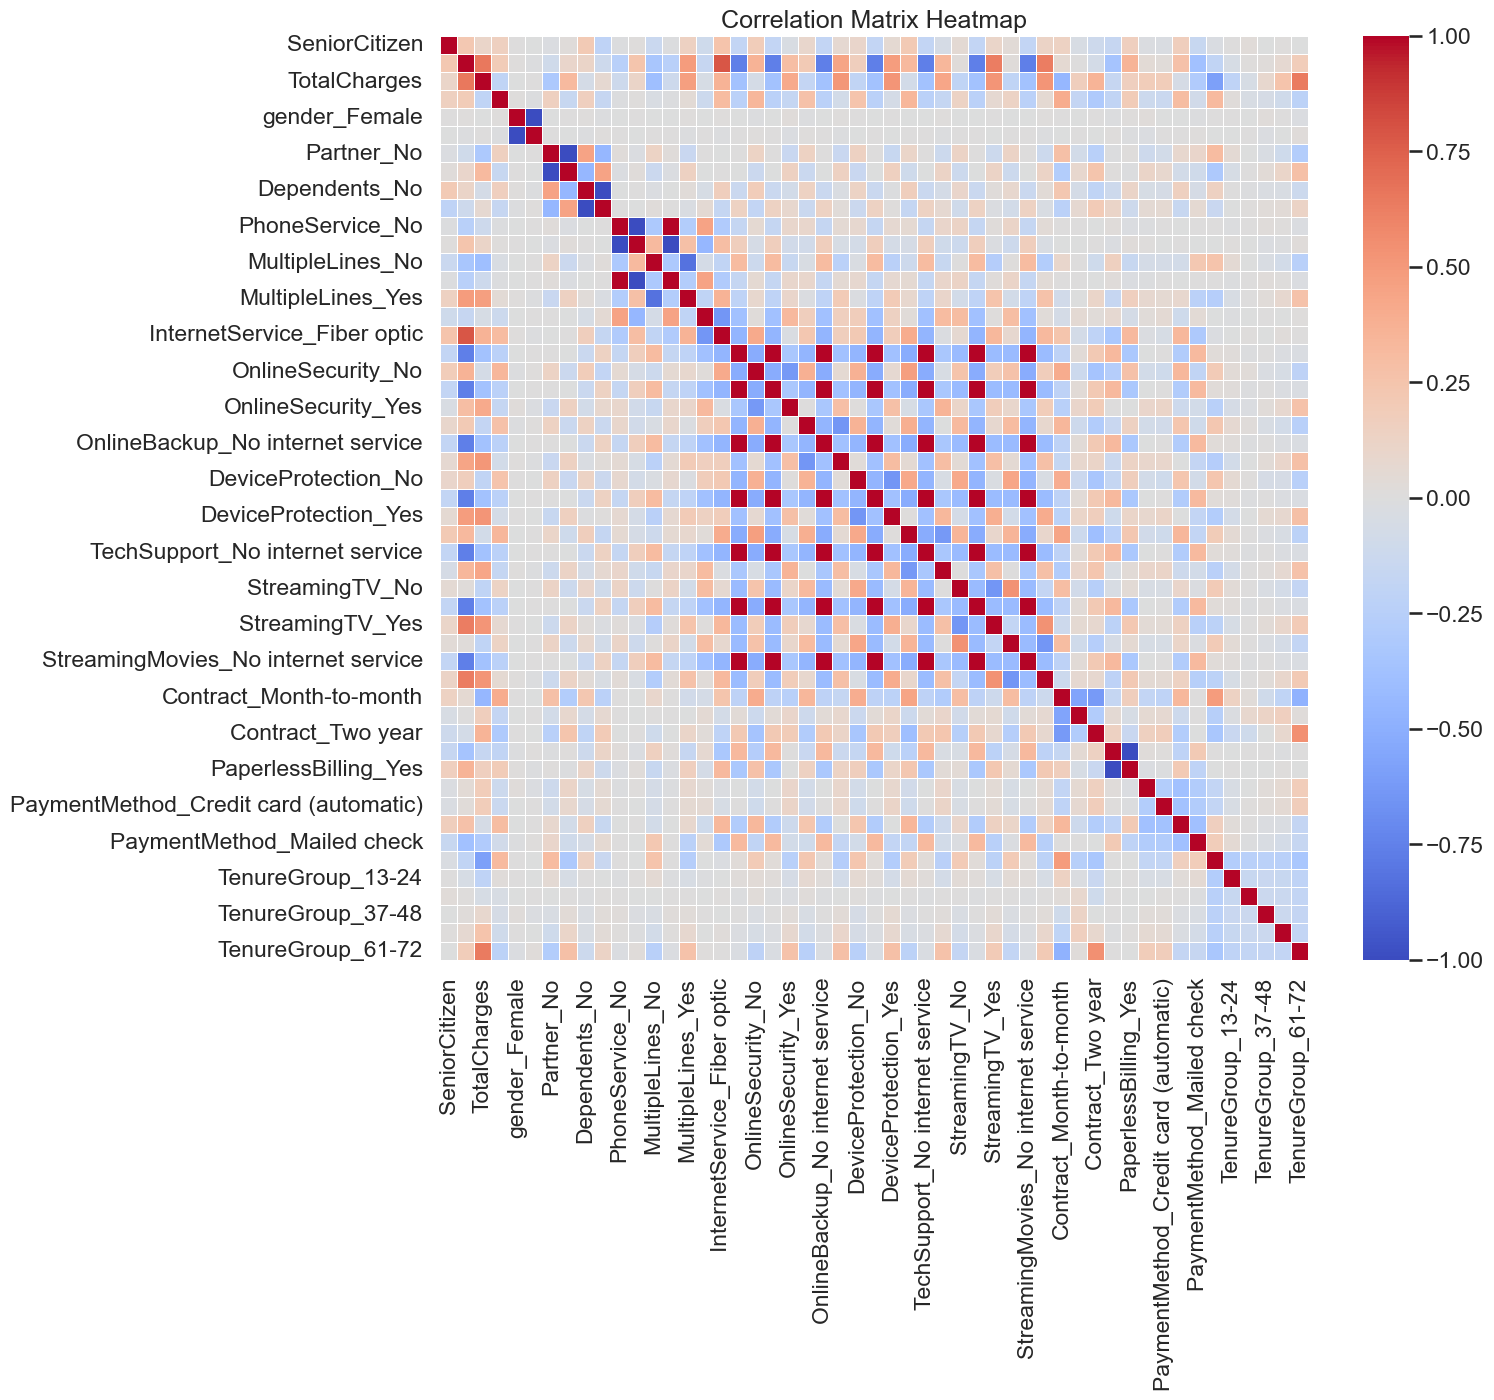

In [64]:
plt.figure(figsize=(14, 12))
sns.heatmap(cm, cmap='coolwarm', linewidths=0.5,vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [65]:
data_dummy.corr()["Churn"].sort_values(ascending= False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
TenureGroup_1-12                           0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192922
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
TenureGroup_

<AxesSubplot: >

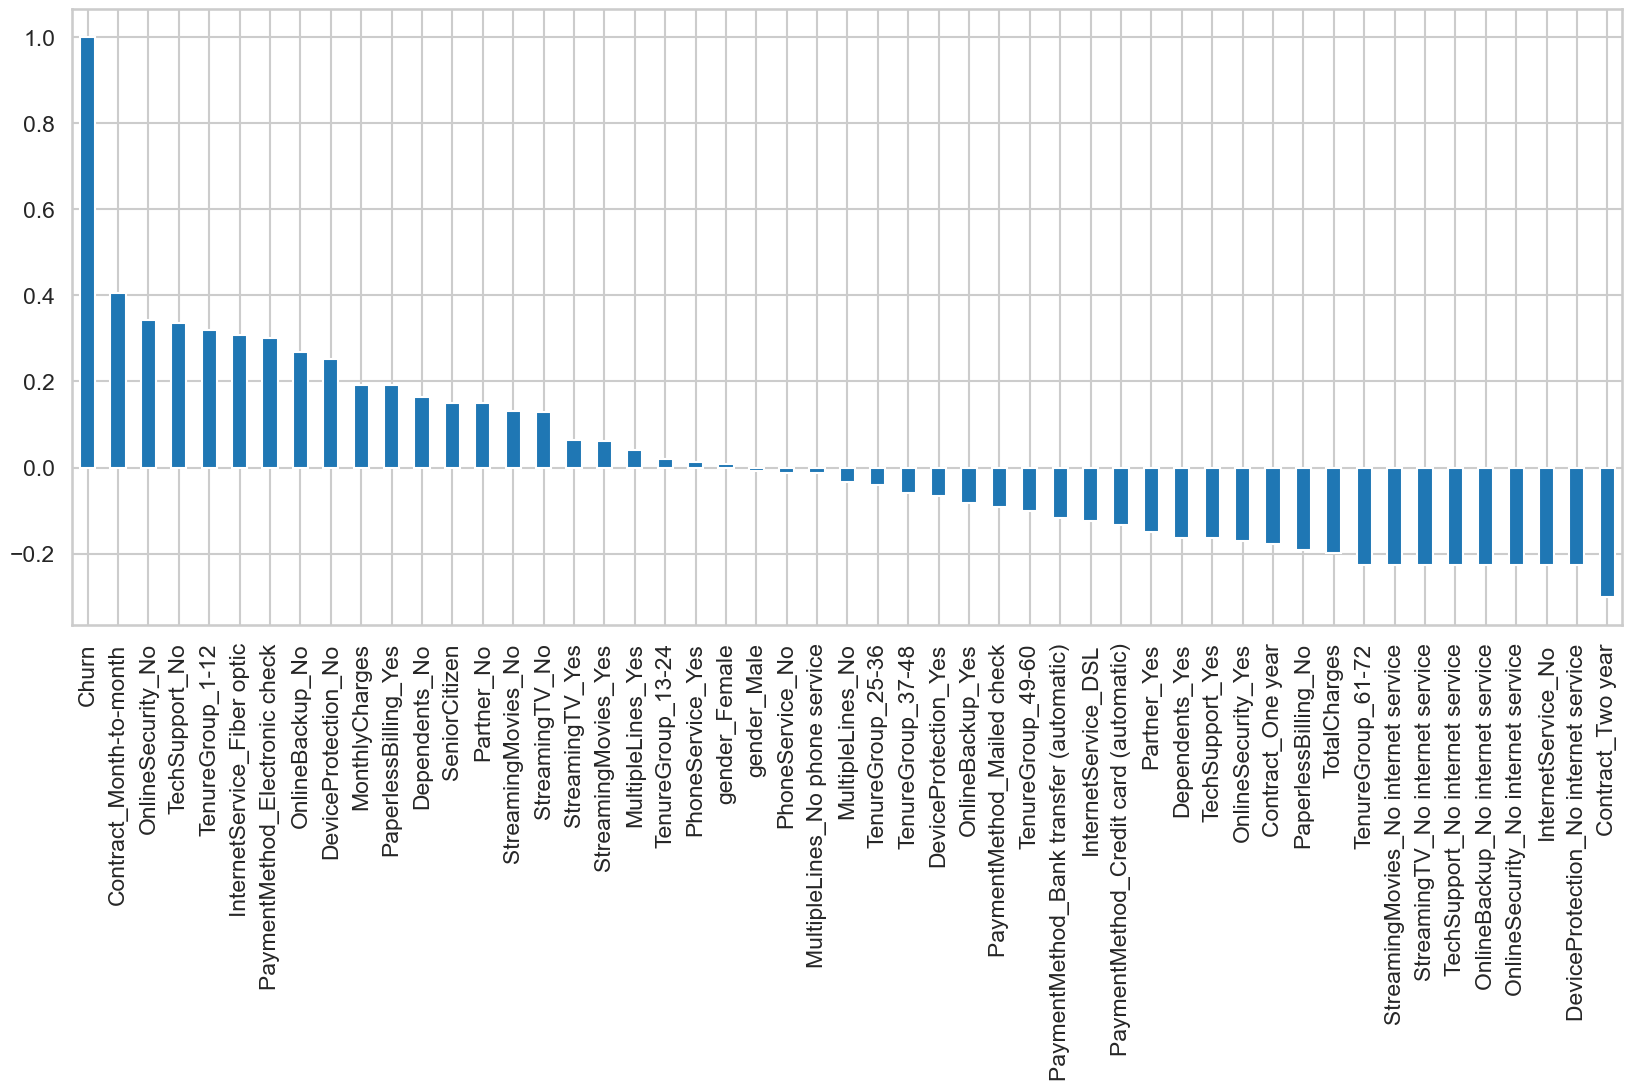

In [66]:
plt.figure(figsize=(20,8))
data_dummy.corr()["Churn"].sort_values(ascending= False).plot(kind="bar")

* High Churn is seen in case of- Month-to-month Contract, No OnlineSecuri, NO 
TechSupp  7 
TenurrG op_8
InternerSe vice_Fiber 
* Low Churn is seen in case of- Long term contract, Subscription without internet service, and tenure 61-72 ie. 5+ years
  optic

## Bivariate Analysis

In [67]:
new_df1_target0=data.loc[data["Churn"]==0]
new_df1_target1=data.loc[data["Churn"]==1]

In [68]:
def common_barplot(data, x, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    # Create the figure and adjust size based on unique values in x and hue
    plt.figure(figsize=(10, 6))
    
    # Create the countplot
    sns.countplot(data=data, x=x, hue=hue, palette='bright')
    
    # Add title
    plt.title(title, fontsize=22)
    
    # Set x-axis and y-axis labels
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    
    # Rotate x-ticks for better readability
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()


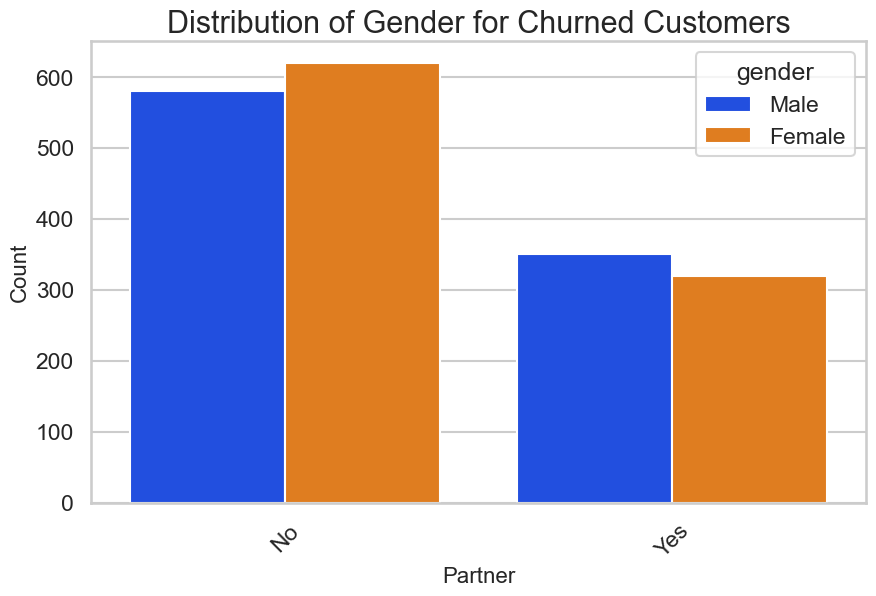

In [69]:
common_barplot(data= new_df1_target1, x='Partner', title='Distribution of Gender for Churned Customers',hue='gender')

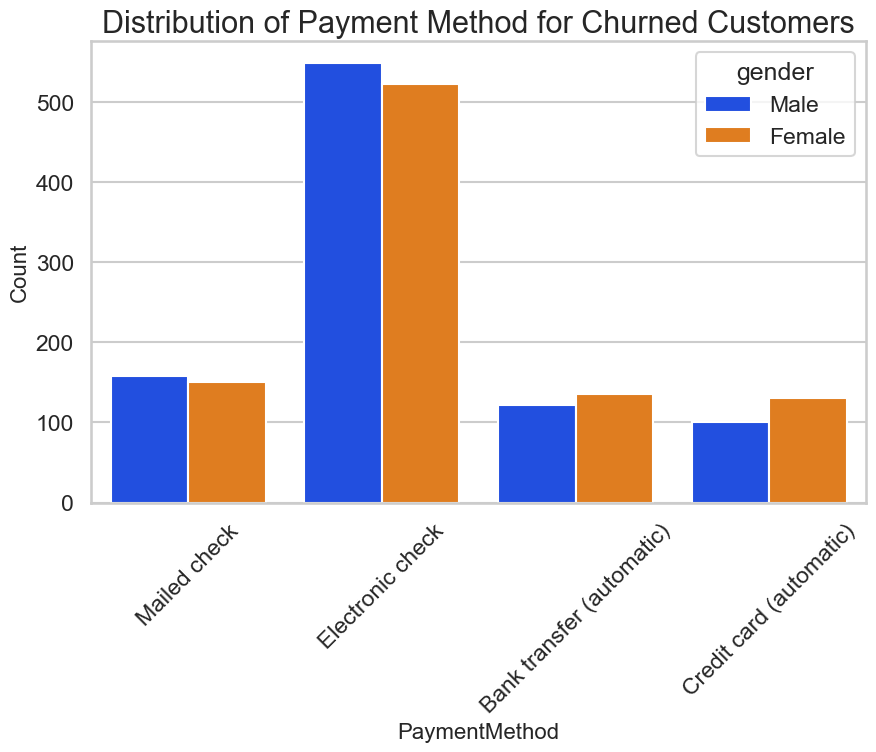

In [70]:
common_barplot(data= new_df1_target1, x='PaymentMethod', title='Distribution of Payment Method for Churned Customers',hue='gender')

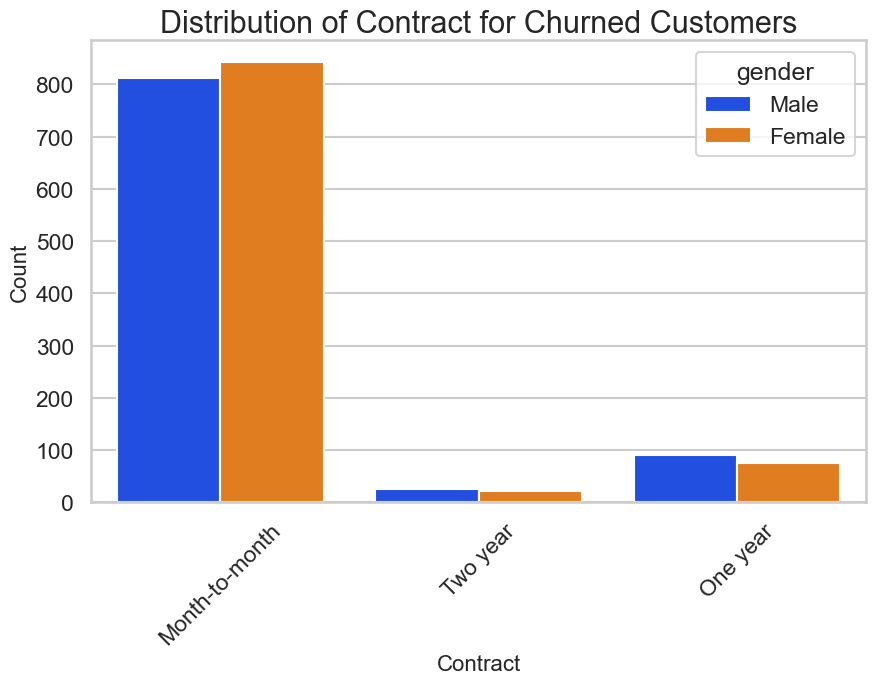

In [71]:
common_barplot(data= new_df1_target1, x='Contract', title='Distribution of Contract for Churned Customers',hue='gender')

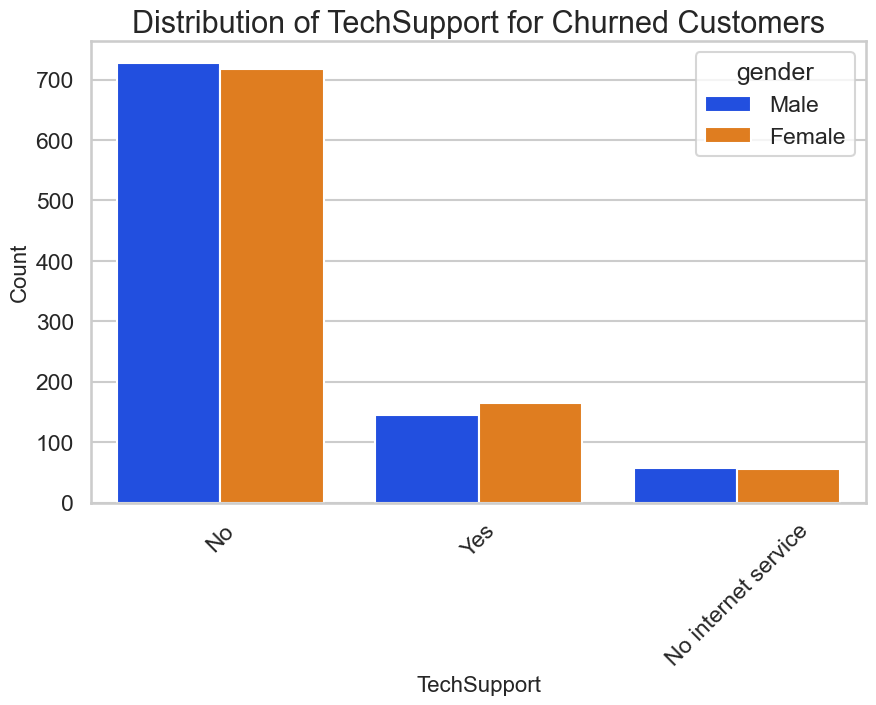

In [72]:
common_barplot(data= new_df1_target1, x='TechSupport', title='Distribution of TechSupport for Churned Customers',hue='gender')

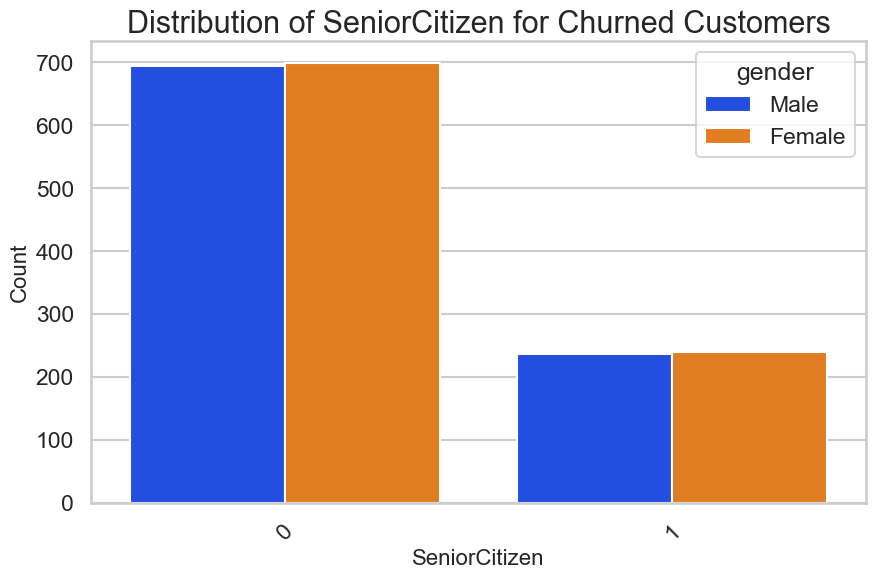

In [73]:
common_barplot(data= new_df1_target1, x='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## CONCLUSION* Electronic check medium are highest churners
* Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* No Online security, No Tech Support category are high churners
* Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insightsghts :)

In [74]:
data_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup_1-12,TenureGroup_13-24,TenureGroup_25-36,TenureGroup_37-48,TenureGroup_49-60,TenureGroup_61-72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [75]:
data_dummy.to_csv("processed_tele_churn.csv")